## ProblemStatement:
You are the datascientist at a telecom company named “Neo” whoes customers are churning out to its competitors. You have to analyze the data of your company and find insights and stop your customers from churning out to other telecom companies.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
 
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

In [3]:
sns.set_style(style = 'dark')

In [4]:
df = pd.read_csv("customer_churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Remarks**
- `TotalCharges` column is inconsitent with the datatype, further investigation requried.

In [8]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

**Remark:**
- `TotalCharges` column contains whitespace as a placeholder for null values.

In [9]:
df.replace(" ", np.nan, inplace = True) ## replacing whitespace with null value.

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [14]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [15]:
##replacing "No Phone service" by "No" in 'MultipleLines' column
df['MultipleLines'] = df['MultipleLines'].replace("No phone service", 'No')

In [16]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [17]:
##replacing "No internet service" by "No" in 'OnlineSecurity' column
df['OnlineSecurity'] = df['OnlineSecurity'].replace("No internet service", 'No')

In [18]:
cols = ['StreamingTV',
    'StreamingMovies',
'TechSupport',
'DeviceProtection',
'OnlineBackup']


In [19]:
##replacing "No internet service" by "No" from all the other columns
for col in cols:
    df[col] = df[col].replace("No internet service", 'No')

# Exploratory Data Analysis
## Univariate Analysis


In [20]:
## exploring target variable
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

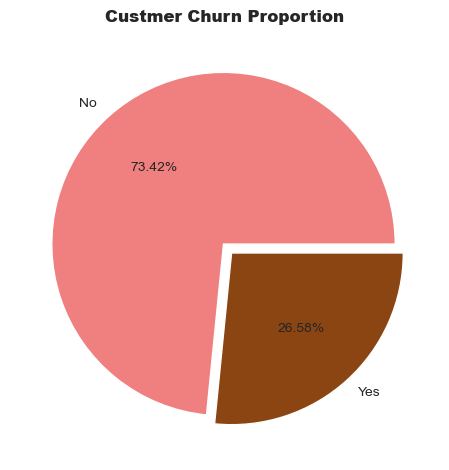

In [21]:

plt.pie(df['Churn'].value_counts().values,
        explode = [0.01,0.06],
        labels = ['No', 'Yes'],
        colors = ['lightcoral', 'saddlebrown'],
        autopct = '%.2f%%')
plt.title("Custmer Churn Proportion", weight = 'black')
plt.tight_layout()
plt.show()
        

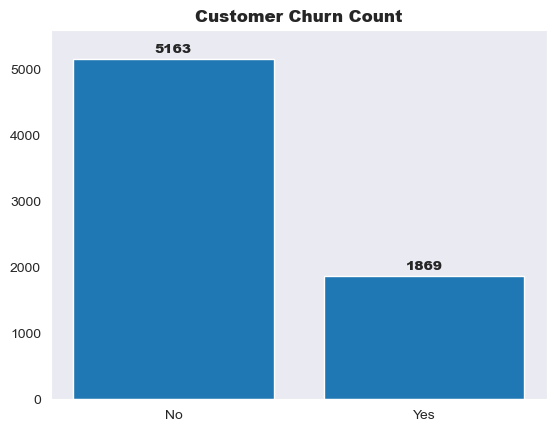

In [22]:
plt.bar(df['Churn'].value_counts().index,
       df['Churn'].value_counts().values)
for x , y in enumerate(df['Churn'].value_counts().values):
    plt.text(x, y+100, y,
             weight = 'black',
            ha = 'center',
            )
plt.ylim(top = 5600)
plt. title("Customer Churn Count", weight = 'black')
plt.show()

**Remarks:**
- 1869 customers (26.58%) are churning out of the company.

In [23]:
## exploring individual variables
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
gender = df['gender'].value_counts()
gender

Male      3549
Female    3483
Name: gender, dtype: int64

In [25]:
def cat_plot(column):
    
    ## creating contingency table
    cross_tab = pd.crosstab(index = df[column],
           columns=df['Churn'],
           margins= True)
    
    contingency_table = cross_tab/cross_tab.loc["All", 'All']
    idx = contingency_table.index[:-1]
        
    ## plotting different proportions
    plt.subplots(nrows = 2, ncols = 2, 
                squeeze = False,
                figsize = (10,8))
    
    #plot1
    plt.subplot(221)
    
    param_ln = len(idx)
    explode = [0.01]*param_ln
    colors = ['lightcoral', 'saddlebrown', 'tomato',  'mediumaquamarine', 'chocolate', 'darksalmon']
    
    plt.pie(contingency_table.iloc[:-1, -1],
        explode = explode,
        labels = idx,
        colors = [color for color in colors],
            startangle=90,
        autopct = '%.2f%%',
           rotatelabels=True)
    plt.title(f"{column} Proportion", weight = 'black')
    
    #plot2
    plt.subplot(222)
    x_loc1 = []
    x_loc2 = []
    
        
    for i, val in enumerate(idx):
        
        ct = cross_tab/cross_tab.loc[val, 'All']
        
        width0 = ct.iloc[:,0].loc[(ct.index == idx[i])]
        width1 = ct.iloc[:,1].loc[(ct.index == idx[i])]
             

        plt.barh(y = ct.index[i],
             width = width0,
                 color = 'mediumaquamarine',
                )
        
        plt.barh(y = ct.index[i],
                 width = width1,
                 color = 'lightsalmon',
                left = width0)
        
        x_loc1.append(ct['No'][val]/2)
        x_loc2.append(ct['No'][val]+ct['Yes'][val]/2)
    
    x_val = []
    x_val.append(x_loc1)
    x_val.append(x_loc2)
    s1 = np.array(x_loc1)*2
    s2 = (np.array(x_loc2)-s1)*2
    s = []
    s.append(s1)
    s.append(s2)
                
    for x,y in zip(x_val, s):
        
        for i, j in enumerate(x):
            s_val = np.round(y[i]*100, 2)
            plt.text(j-0.02, i, s = (str(s_val)+'%'), weight = 'black')
            
    plt.title(f"{column} Distribution % w.r.t. Target", weight = 'black')
    plt.yticks(idx)
    plt.legend(['Churn: False', 'Churn: True'])
    
    
    #plot3
    plt.subplot(223)
    plt.bar(df[column].value_counts().index,
       df[column].value_counts().values)
    for x , y in enumerate(df[column].value_counts().values):
        plt.text(x, y+100, y,
                 weight = 'black',
                ha = 'center',
                )
    plt.ylim(top = df[column].value_counts().max()+500)
    plt.xticks(rotation = 90)
    plt. title(f"{column} Count", weight = 'black')
    #plt.show()
    
    #plot4
    #plt.figure(figsize = (10,7))
    plt.subplot(224)
    sns.countplot(x= df[column], hue= df['Churn'],
             palette= "Set2")
    for i in range(len(df[column].unique())):
        j = [i-0.2,i+0.2]               
    
        for x, hue in zip(j, df['Churn'].unique() ):
            y = df.loc[(df[column] == df[column].unique()[i]) & (df['Churn'] == hue) ].shape[0]
            plt.text(x, y+100, y,
                weight = 'black',
                ha = 'center')
    plt.title(f"{column} Distribution Count w.r.t. Target", weight = 'black')
    plt.xticks(rotation = 90)
    plt.ylim(top = pd.crosstab(index = df[column],
           columns=df['Churn']).max().max()+300)
    
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)
    plt.show()
    

In [26]:
cat_cols = df.select_dtypes(include = 'object').columns[1:-1]
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

# <u>Categorical Features:</u>

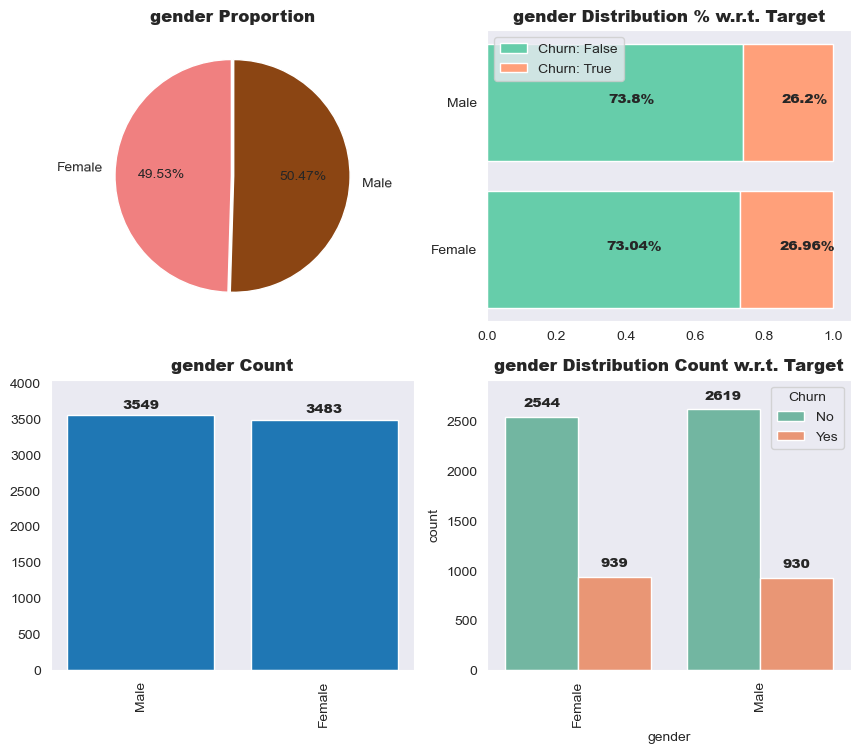

In [27]:
cat_plot(cat_cols[0])

**Remarks:**
- 50% of the customers are `Male` whereas remaining 50% are `Female`
- The churn rate for both males and females is between 26-27%

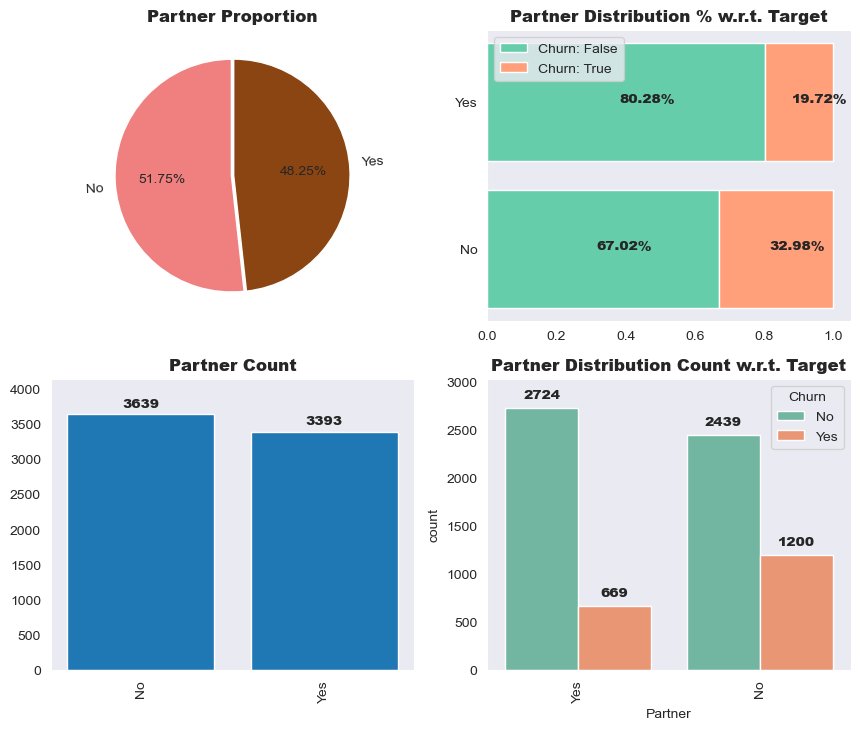

In [28]:
cat_plot(cat_cols[1])

**Remarks:**
- 48% customers are having partern whereas 52% customers does not have any partner.
- Customers having partner are churning at 19.2% rate
- Customers having no partner are churning at 32.98% rate

### Inference:
- Customer without partner is more likely to churn out
- Customer without partner is likely to churn 13.7% more than the customer with partner.
- Churn rate for customer without partner is 71.77% more compare to customer with partner.

### Hypothesis:
- `Partner` column has high importance for prediction model


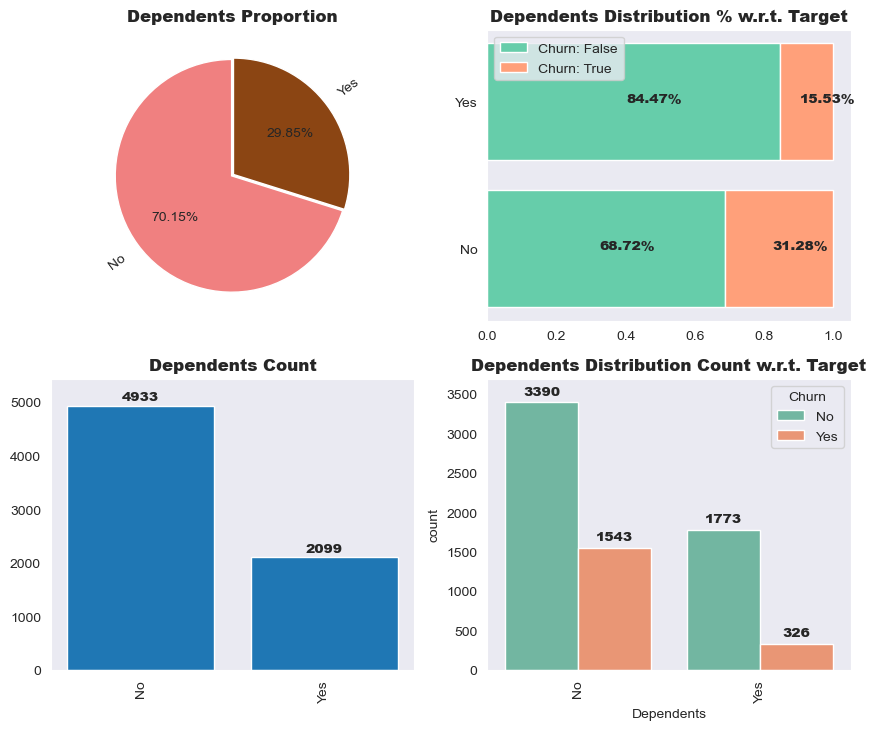

In [29]:
cat_plot(cat_cols[2])

**Remarks:**
- 70.15% customers does not have any dependents whereas 29.85 customers does.
- Customers having dependents are churning at 15.53% rate
- Customers having no partner are churning at 31.28% rate

### Inference:
- Customer without dependents is more likely to churn out
- Customer without dependents is likely to churn 15.75% more than the customer with dependents.
- Churn rate for customer without partner is almost 100% more compare to customer with dependents.

### Hypothesis:
- `Dependents` column has high importance for prediction model

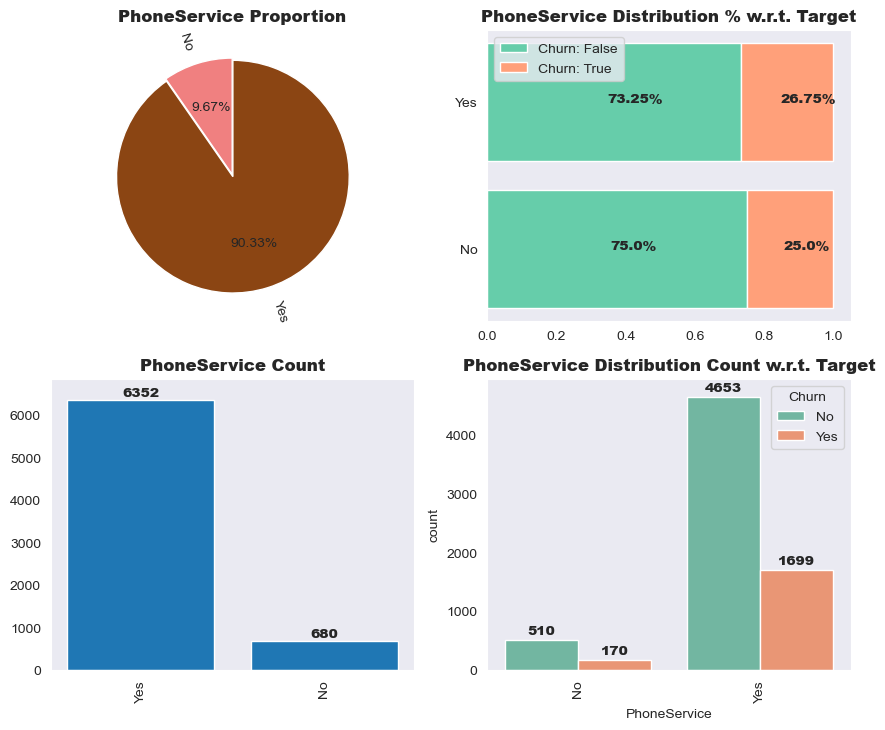

In [30]:
cat_plot(cat_cols[3])

**Remarks:**
- 90% customers are having Phone Service whereas 10% customers does not have Phone Service.
- Customers having Phone Service are churning at 26.75% rate
- Customers having no partner are churning at 25.0% rate

### Inference:
- Customer with and without Phone Service is equaly likely to churn


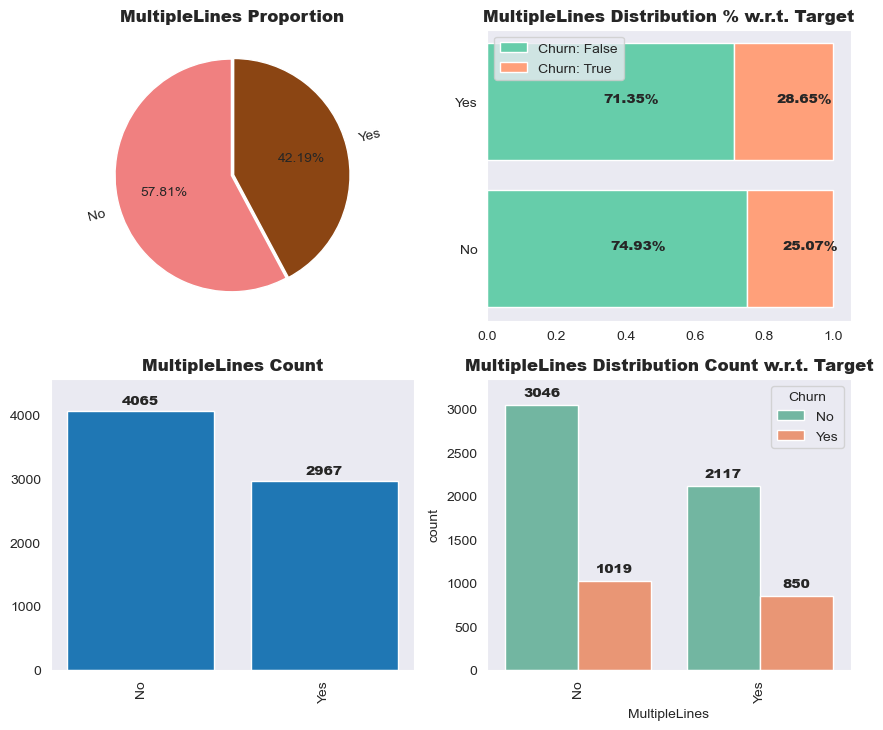

In [31]:
cat_plot(cat_cols[4])

**Remarks:**
- 42.19% customers are having Multiple Lines whereas 57.81% customers does not have Multiple Lines.
- Customers having Multiple Lines are churning at 28.65% rate
- Customers having no Multiple Lines are churning at 25.07% rate

### Inference:
- Customer with and without Multiple Lines is equaly likely to churn

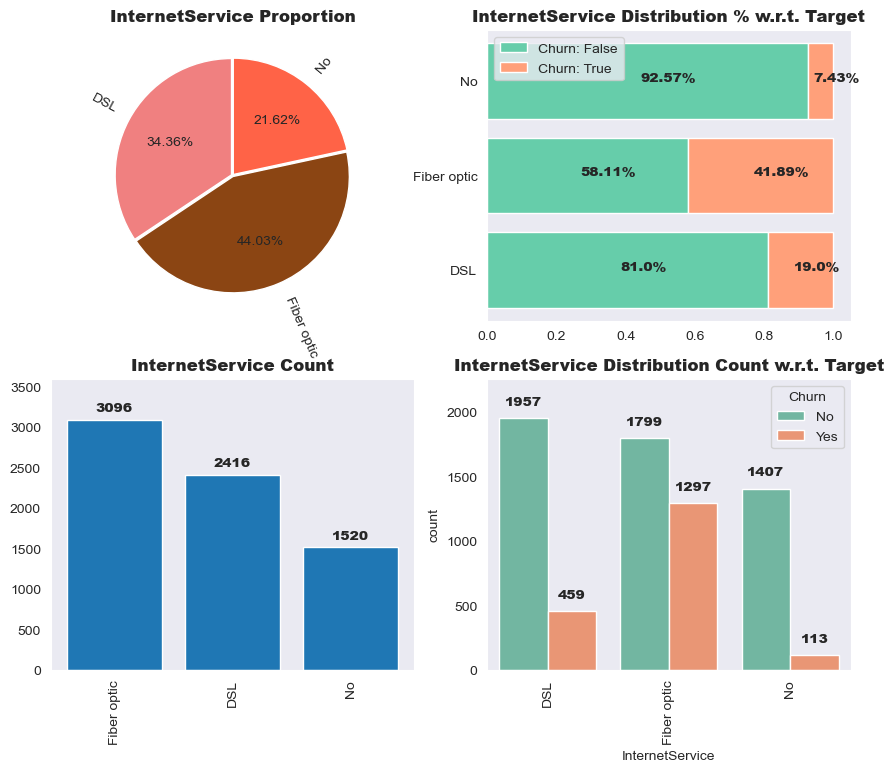

In [32]:
cat_plot(cat_cols[5])

**Remarks:**
- 44.03% custermers have `Fiber optic` as a internet service.
- Churning is highest(41.89%) amoung the costumenr having fiber optic.
- 19% of the customers with `DSL` as Internet service are churning.

### Inference:
- Customers with `DSL` are churning 155% more than that of customer without internet service.
- Customers with `Fiber optic` are curning 463% more than that of customer without internet sevice.

### Hypothesis:
- `InternetService` feature is of extreme importance for predicitve modeling.


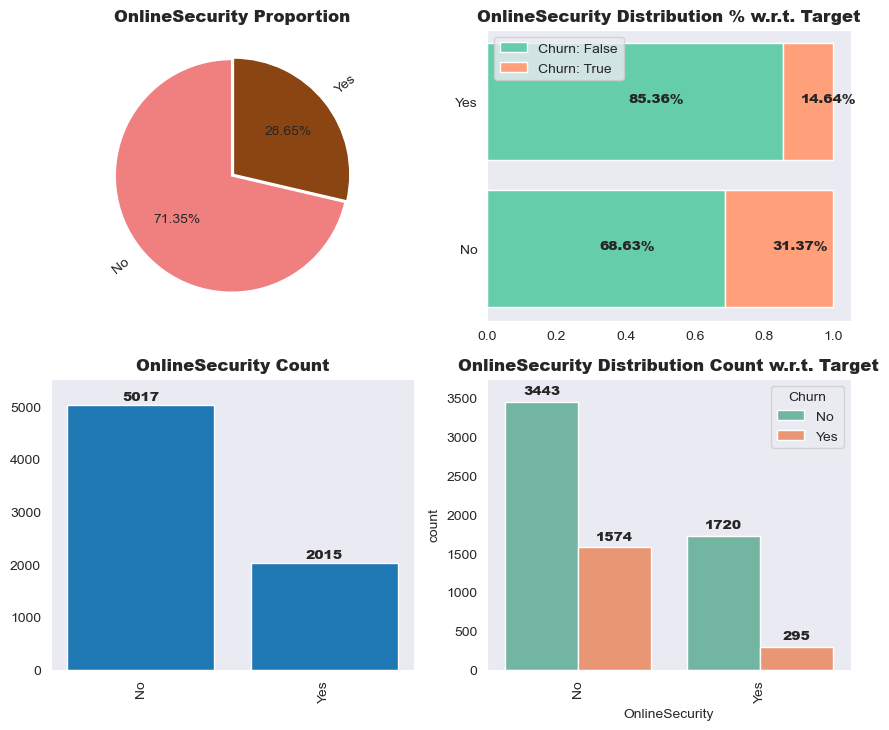

In [33]:
cat_plot(cat_cols[6])

**Remarks:**
- Only 26.65% customers opted for Online Security.
- Churning is highest for the customers who does not opted for Online Security .
- 31.37% of the customers churns with out `OnlineSecurity` service.

### Inference:
- Customers without `OnlineSecurity` are churning 16.73% more than that of customer with the service.
- Customers without `OnlineSecurity` are curning 114% more wrt customer with sevice.

### Hypothesis:
- `OnlineSecurity` feature is of extreme importance for predicitve modeling.


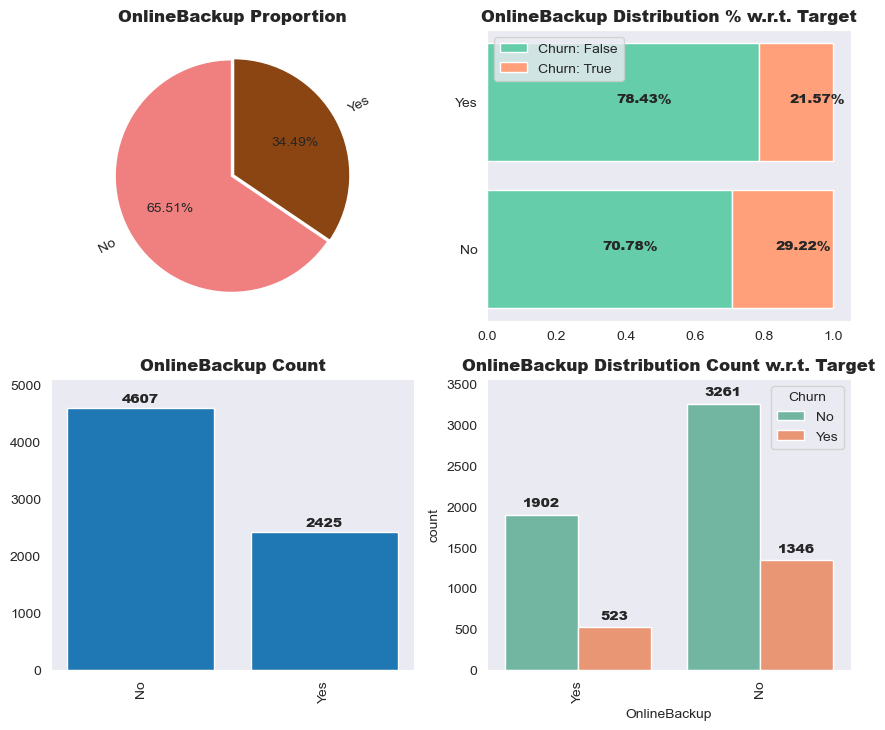

In [34]:
cat_plot(cat_cols[7])

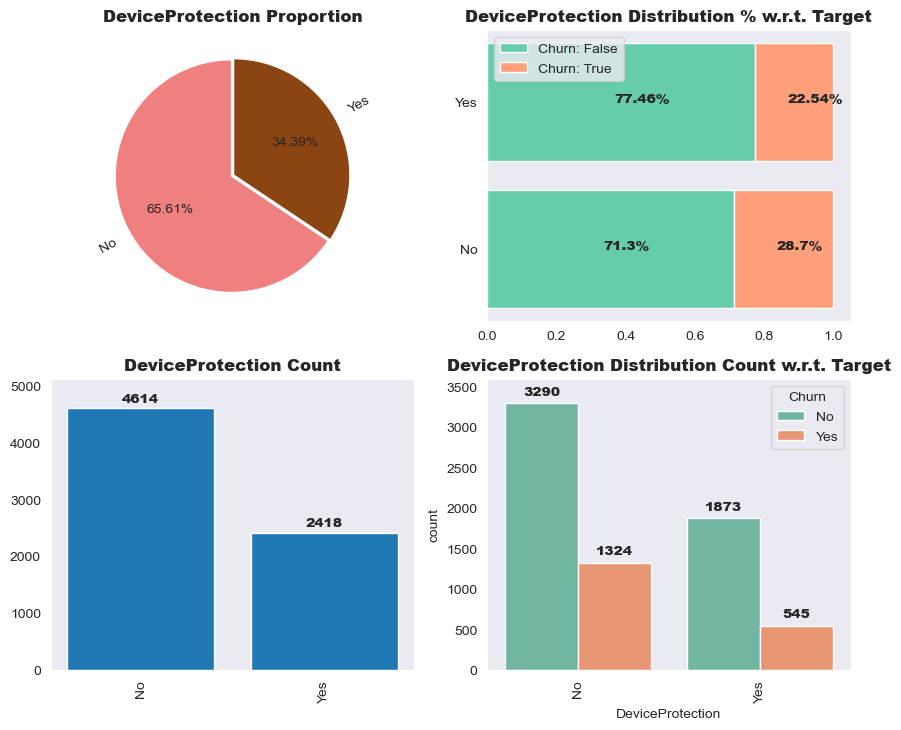

In [35]:
cat_plot(cat_cols[8])

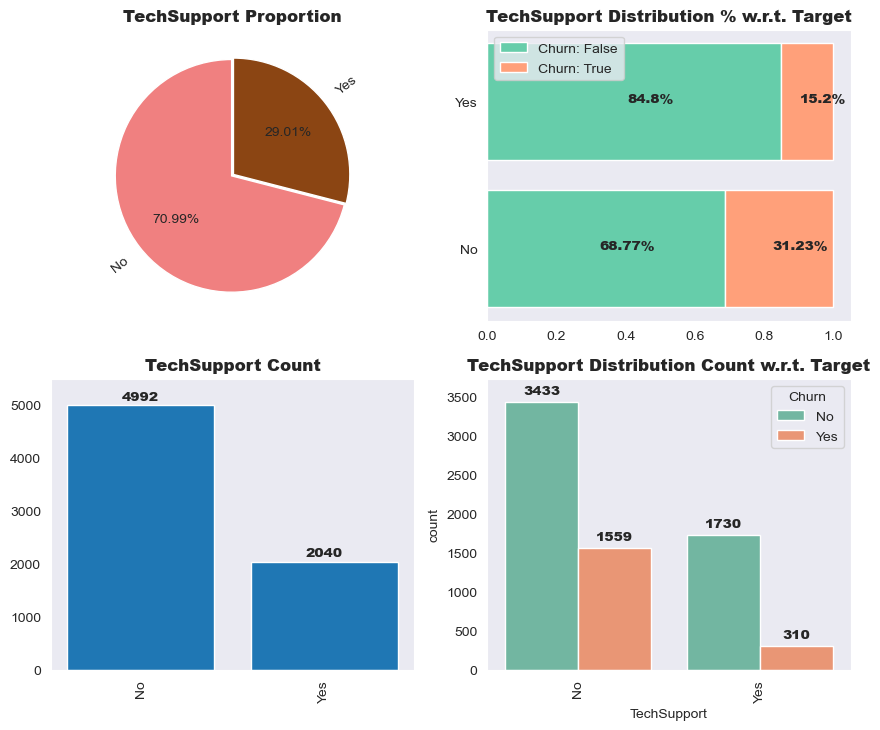

In [36]:
cat_plot(cat_cols[9])

**Remarks:**
- Only 29.01% customers opted for `TechSupport`.
- Churning is highest for the customers who does not opted for `TechSupport` .
- 31.23% of the customers churns with out `TechSupport` service.

### Inference:
- Customers without `TechSupport` are churning 16.03% more than that of customer with the service.
- Customers without `TechSupport` are curning 105% more wrt customer with sevice.

### Hypothesis:
- `TechSupport` feature is of extreme importance for predicitve modeling.

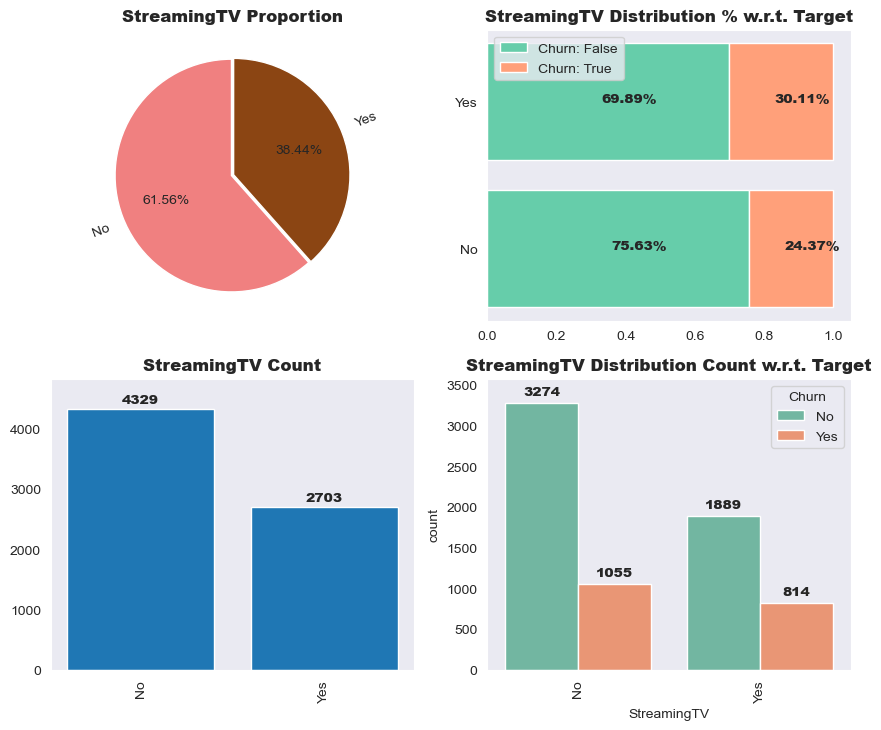

In [37]:
cat_plot(cat_cols[10])

**Remarks:**
- 38.44% customers opted for `StreamingTV` service.
- Churning is highest for the customers who opted for `StreamingTV` .
- 30.11% of the customers churns with `StreamingTV` service.

### Inference:
- Customers with `StreamingTV` are churning 6.4% more than that of customer without the service.
- Customers with `StreamingTV` are curning 26.26% more wrt customer without sevice.

### Hypothesis:
- `StreamingTV` feature is of importance for predicitve modeling.

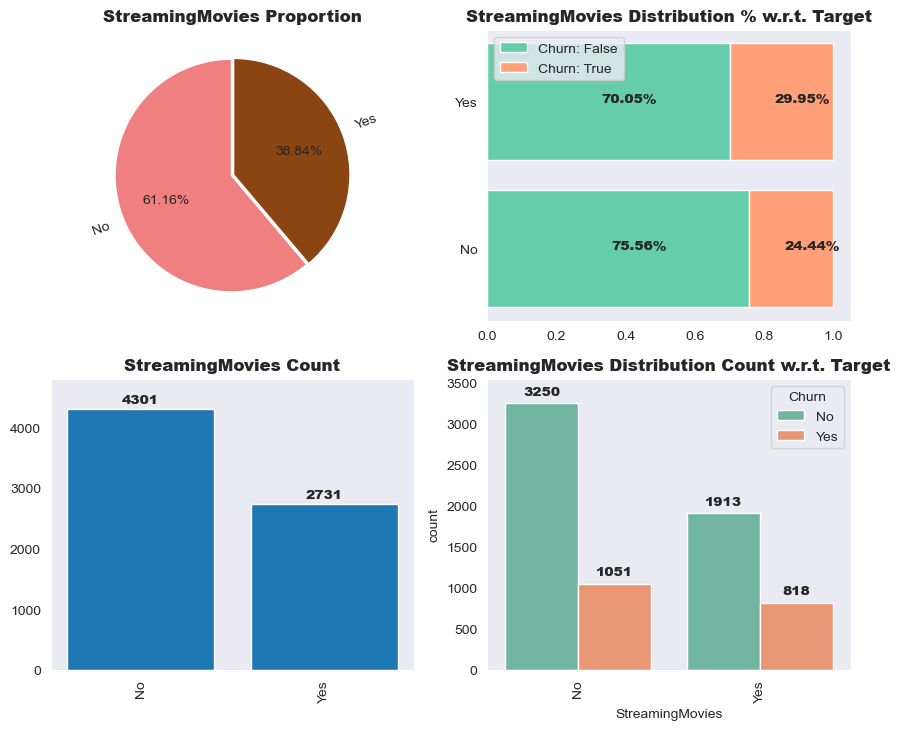

In [38]:
cat_plot(cat_cols[11])

**Remarks:**
- 38.84% customers opted for `StreamingMovies` service.
- Churning is highest for the customers who opted for `StreamingMovies` .
- 29.95% of the customers churns with `StreamingMovies` service.

### Inference:
- Customers with `StreamingMovies` are churning 5.51% more than that of customer without the service.
- Customers with `StreamingMovies` are curning 22.54% more wrt customer without sevice.

### Hypothesis:
- `StreamingMovies` feature is of importance for predicitve modeling.

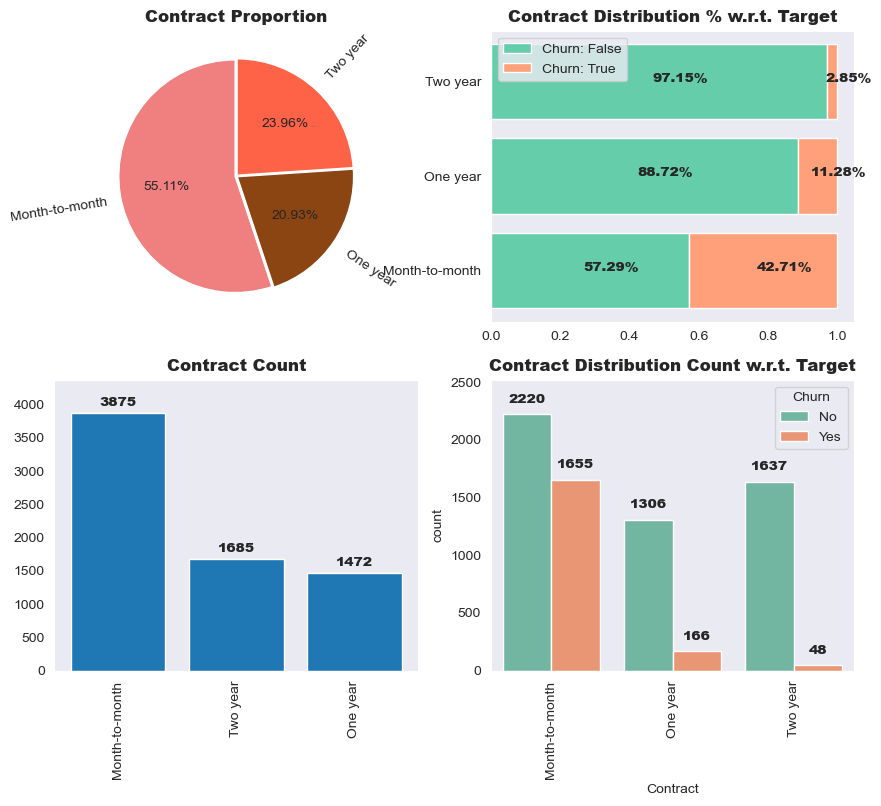

In [39]:
cat_plot(cat_cols[12])

**Remarks:**
- Most of the custermers (55.11%) opted `Month-to-month` as a contract type with `Two year` second choice as 23.96% customers are opted and `one year` contract type is least opted with 20.93% customers.
- Churning is highest (42.71%) for the costumers with `Month-to-month` contract and least (2.85%) for the customers with `Two year` contract.
- 11.28% of the customers with `One year` contract are churning.

### Inference:
- Customers with `Month-to-month` are churning <B>1398%</B> more w.r.t. the customers with `Two year` contract..
- Customers with `one year` are curning <B>295%</B> more w.r.t the customers with `Two year` contract..

### Hypothesis:
- `Contract` feature is of extreme importance for predicitve modeling.


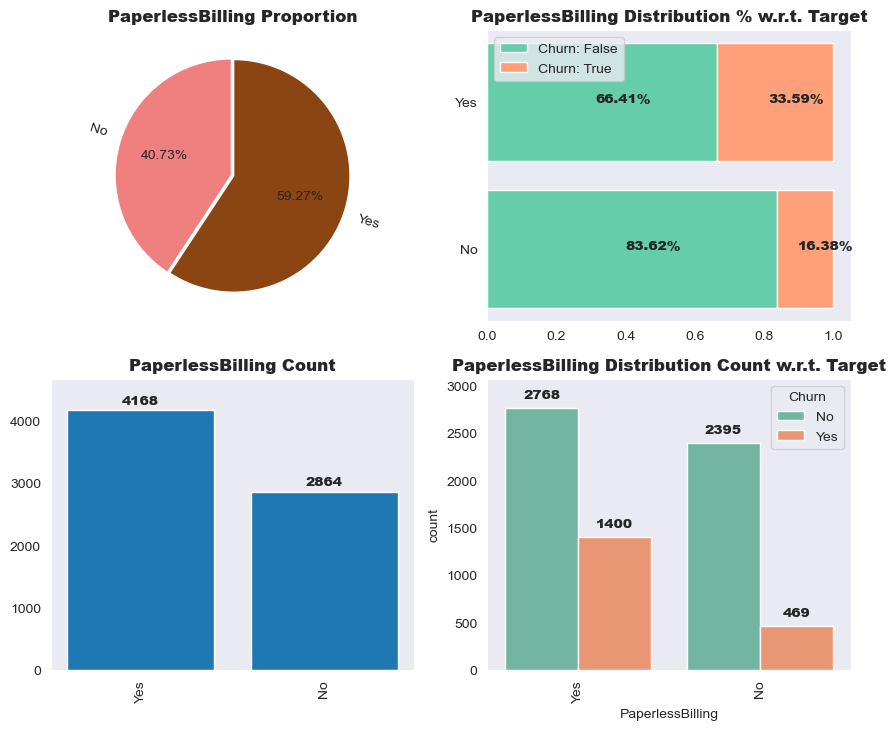

In [40]:
cat_plot(cat_cols[13])

**Remarks:**
- 59.27% customers opted for `PaperlessBilling` service.
- Churning is highest for the customers who opted for `PaperlessBilling` .
- 33.59% of the customers churns with `PaperlessBilling` service.

### Inference:
- Customers with `PaperlessBilling` are churning 17.21% more than that of customer without the service.
- Customers with `PaperlessBilling` are curning 105.06% more wrt customer without sevice.

### Hypothesis:
- `PaperlessBilling` feature is of importance for predicitve modeling.

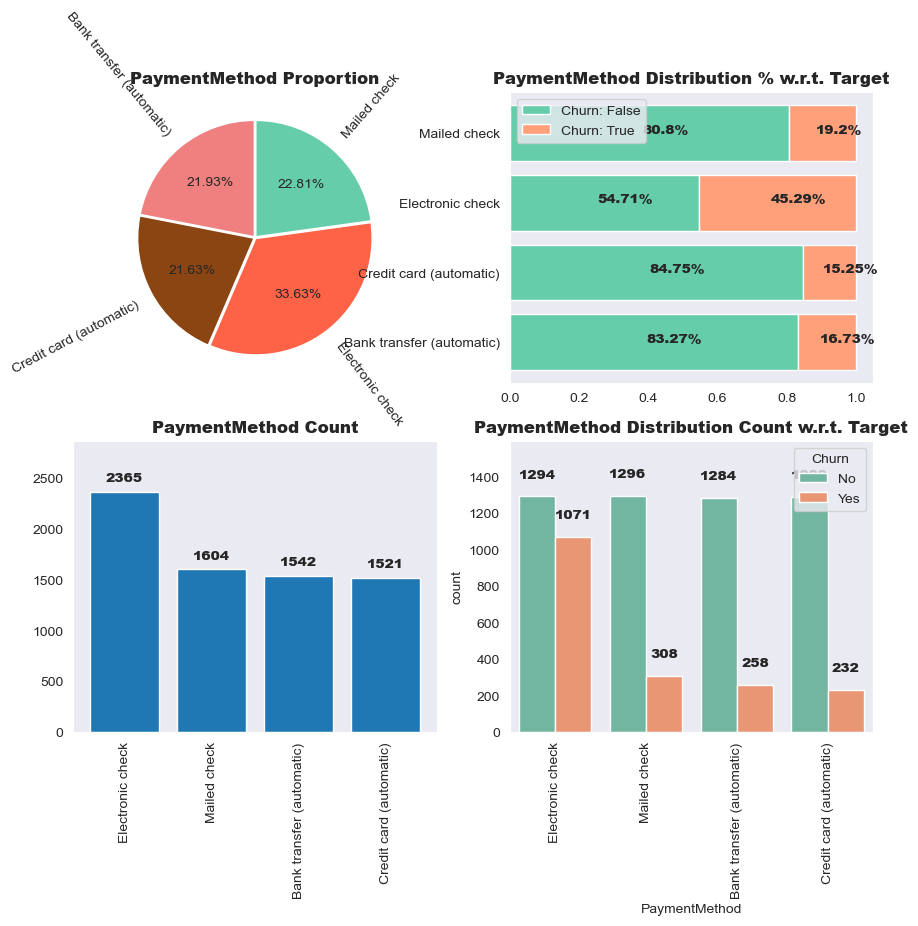

In [41]:
cat_plot(cat_cols[14])

**Remarks:**
- `Electronic Check` is most opted payment method with 33.63% of customers. While other payement methods are more or less equally opted by customers (`Mailed Check` (22.81%), `Credit Card`(21.63%), `Bank Transfer` (21.93%))
- `Electronic Check` payment method has highest churners (45.29%) compared to other payment method.
- `Credit Card` payement method had lowest churners (15.25%)
### Inference:
- Customers with `Electronic Check` are churning <B>196%</B> more w.r.t. the customers with `Credit Card` payement method.
- Customers with `Mailed Check` are curning <B>25.9%</B> more w.r.t the customers with `Credit Card` payement method.
- Customers with `Bank Transfer` are curning <B>9.7%</B> more w.r.t the customers with `Credit Card` payement method.

### Hypothesis:
- `PaymentMethod` feature is of extreme importance for predicitve modeling.

## Summary:

In [177]:
def per_cat_churn(column):
    
    ct = pd.crosstab(index = df[column],
           columns= df['Churn'],
           margins= True)
    ft = ct/ct.loc['All', 'All']
    churn = np.round(ft.loc['All', 'Yes'], 4)*100
    return churn    

In [181]:
churn_dict = {'col':[col for col in cat_cols]}
churn_list = []
for col in cat_cols:
    churn_list.append(per_cat_churn(col))
churn_dict['churn%'] = churn_list


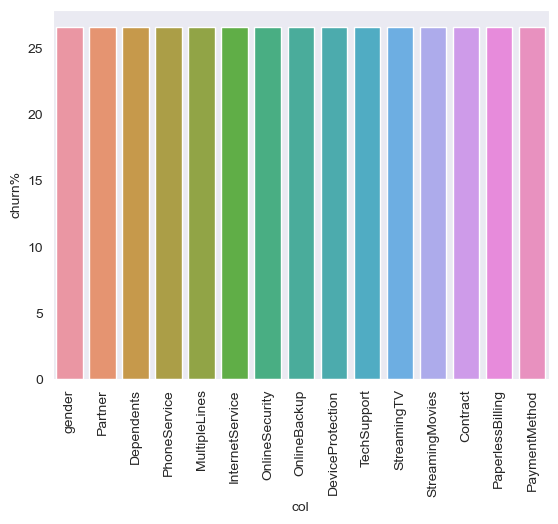

In [201]:
churn_df = pd.DataFrame(data = churn_dict, columns = ['col', 'churn%'])
sns.barplot(x = 'col', y = 'churn%', data = churn_df)
plt.xticks(rotation = 90)
plt.show()

- We can see <b>`26%`</b> customers are churning uniformly.
- However, after univariate analysis we descover the following:
    * Customers without parterns and customers without dependents are churning, <b>`71%`</b> and <b>`100%`</b> more than the customers with parterns and customers with dependents when analyzed in isolation respectively.
    * Customers with Fiber optic internet service are churning <b>`463%`</b> more than without internet service, customers with Fiber optic internet service are churning <b>`120%`</b> more than with internet service as DSL, and customers with Fiber optic internet service are churning <b>`155%`</b> more than without internet service.
    * Customers without online security service are churning <b>`114%`</b> more than customers with online security service.
    * Customers without Tech Support service are churning <b>`105%`</b> more than customers with Tech support service.
    * Customers with contract type month-to-month are churning <b>`1398%`</b> more than two year contract, and <b>`278%`</b> more than one year contract, customers with contract type two year are churning <b>`295%`</b> more than one year contract .
    * Customers with paperless billing service are churning <b>`105%`</b> more than customers without paperless billing service.
    * Customers with payment method electronic check are churnig <b>`165%`</b> more than average churn of payment method without electronic check.

## Bivariate Analysis:

In [131]:
def bivariate_cat(col1, col2):
    
    ct = pd.crosstab(index = [df[col] for col in [col1, col2]],
           columns = df['Churn'],
           margins = True)
    
    feature = df[col1].unique()
    nrows = len(feature)
    
    plt.subplots(nrows=nrows, ncols=2,
                sharex= False, figsize=(12,8))
    
    plot_num = 1
         
    for i in range(len(feature)):
                       
        ft = ct.loc[feature[i]]/np.sum(ct.loc[feature[i]])['All']
        
        idx = ft.index
            
         
        param_ln = len(idx)
        explode = [0.01]*param_ln
        colors = ['lightcoral', 'saddlebrown', 'tomato',  'mediumaquamarine', 'chocolate', 'darksalmon']
        
        #plt.figure()
        plt.subplot(nrows,2,plot_num)
        plt.pie(ft.loc[:, 'All'],
            explode = explode,
            labels = idx,
            colors = [color for color in colors],
            startangle=90,
            autopct = '%.2f%%',
            rotatelabels=True)
        
        plt.title(f"{col2} Proportion" + "\n"+ f"for {col1} = {feature[i]}", weight = 'black',  fontsize = 10)
        
        #plt.figure()
        plt.subplot(nrows,2,plot_num+1)
        
        for j in range(len(idx)):
            
            ft1 = ct.loc[feature[i]]/ct.loc[feature[i]].iloc[j, -1]
            ft_idx = ft1.index
            
            width0 = ft1.loc[ft_idx[j], :'All'][0]
            width1 = ft1.loc[ft_idx[j], :'All'][1]
            
            
            plt.barh(y = ft1.index[j],
                         width = width0,
                        color = 'mediumaquamarine')
            plt.barh(y = ft1.index[j],
                         width = width1,
                         color = 'lightsalmon',
                         left = width0)
            
            x_loc = [0.32, 0.86] #text location
            for m in range(2):
                
                s = np.round(ft1.iloc[j, :-1][m]*100,2)
                plt.text(x = x_loc[m], y = j, s = str(s)+'%', weight = 'black')
                
            
        plt.title(f"{col2} Distribution for {col1} = {feature[i]}"+ "\n" + "w.r.t target Variable", weight = "black", fontsize = 10)
        plt.yticks(idx)
        plt.ylabel(col2, weight = 'black')
        plt.legend(['Churn: False', 'Churn: True'])
        
        plot_num = plot_num+2
        
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)
    plt.show()
        
        
        

In [134]:
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

### InternetService vs All services:

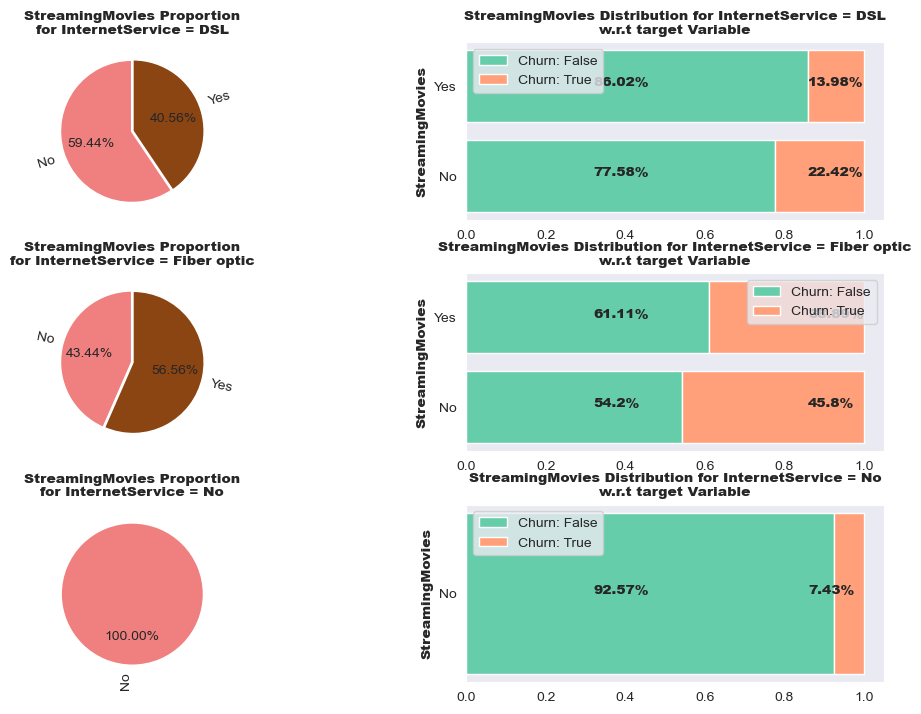

In [144]:
bivariate_cat('InternetService', 'StreamingMovies')

**Remarks:**

- 40% of the customers with `InternetService` as `DSL` opted for `StreamingMovies`.
- 56% of the customers with `InternetService` as `Fiber optic` opted for `StreamingMovies`

### Inferences: 
- Those who are not opted for `StreamingMovies` with `InternetService` as `DSL` are churning 60% more than that of customers with `InternetService` as `DSL` opted for `StreamingMovies`
- On an average 42.84% customers with `InternetService` as `Fiber optic` are churning regardless of the service `StreamingMovies`

### Hypothesis:
- `InternetService` as `Fiber optic` is one of the root cause for customer churning.

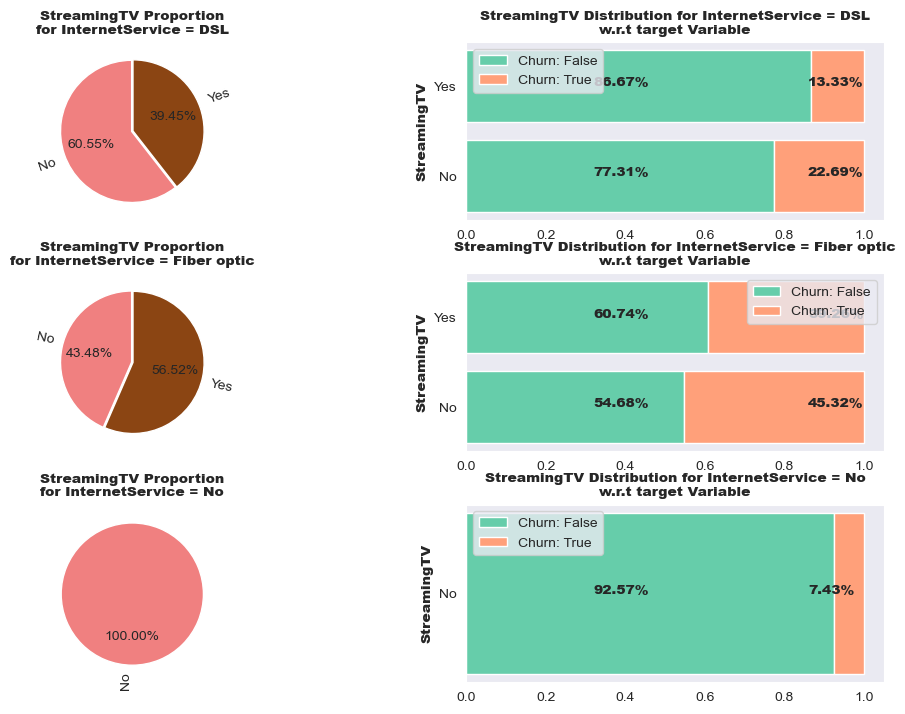

In [143]:
bivariate_cat('InternetService', 'StreamingTV')

**Remarks:**

- 39.45% of the customers with `InternetService` as `DSL` opted for `StreamingTV`.
- 56.52% of the customers with `InternetService` as `Fiber optic` opted for `StreamingTV`

### Inferences: 
- Those who are not opted for `StreamingTV` with `InternetService` as `DSL` are churning 69.76% more than that of customers with `InternetService` as `DSL` opted for `StreamingTV`
- On an average 42.29% customers with `InternetService` as `Fiber optic` are churning regardless of the service `StreamingTV`

### Hypothesis:
- `InternetService` as `Fiber optic` is one of the root cause for customer churning.

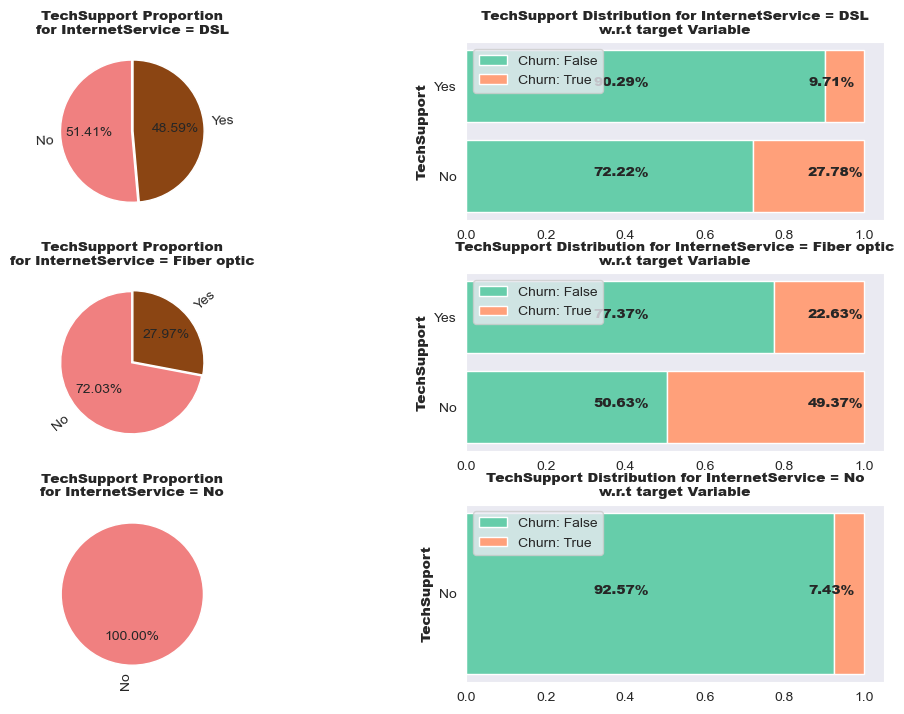

In [142]:
bivariate_cat('InternetService', 'TechSupport')

**Remarks:**

- 48.59% of the customers with `InternetService` as `DSL` opted for `TechSupport`.
- 27.97% of the customers with `InternetService` as `Fiber optic` opted for `TechSupport`

### Inferences: 
- Those who are not opted for `TechSupport` with `InternetService` as `DSL` are churning 186.76% more than that of customers with `InternetService` as `DSL` opted for `TechSupport`
- Those who are not opted for `TechSupport` with `InternetService` as `Fiber optic` are churning 118.16% more than that of customers with `InternetService` as `DSL` opted for `TechSupport`
- `TechSupport` for customers with `InternetService` as `Fiber optic` is one of the root cause of churning.
- Customers without `TechSupport` are churning more than that of with `TechSupport`

### Hypothesis:
- `TechSupport` for customers with `InternetService` is one of the decisive feaure for predictive modeling.


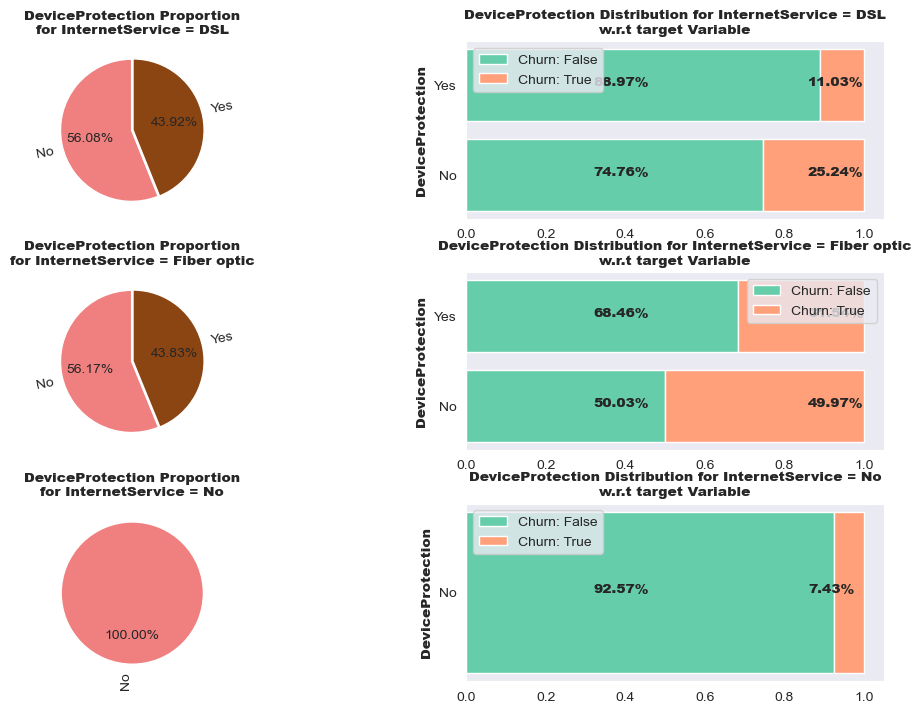

In [141]:
bivariate_cat('InternetService', 'DeviceProtection')

**Remarks:**

- 43.92% of the customers with `InternetService` as `DSL` opted for `DeviceProtection`.
- 43.83% of the customers with `InternetService` as `Fiber optic` opted for `DeviceProtection`

### Inferences: 
- Those who are not opted for `DeviceProtection` with `InternetService` as `DSL` are churning 128.88% more than that of customers with `InternetService` as `DSL` opted for `DeviceProtection`
- Those who are not opted for `DeviceProtection` with `InternetService` as `Fiber optic` are churning 58.43% more than that of customers with `InternetService` as `DSL` opted for `DeviceProtection`
- `DeviceProtection` for customers with `InternetService` as `Fiber optic` is one of the root cause of churning.
- Customers without `DeviceProtection` are churning more than that of with `TechSupport`

### Hypothesis:
- `DeviceProtection` for customers with `InternetService` is one of the decisive feaure for predictive modeling.


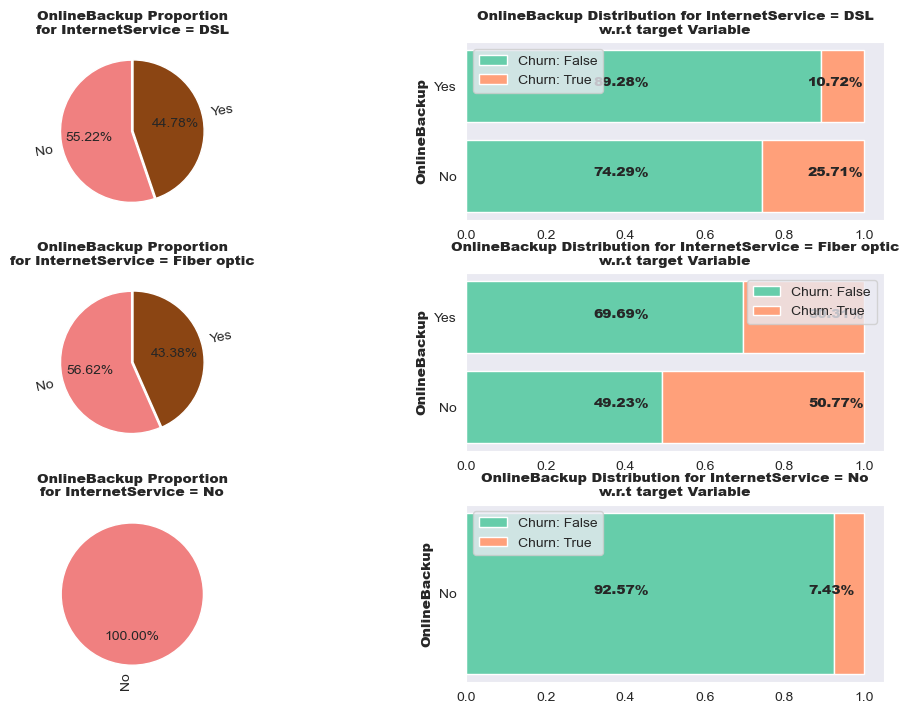

In [140]:
bivariate_cat('InternetService', 'OnlineBackup')

**Remarks:**

- 44.78% of the customers with `InternetService` as `DSL` opted for `OnlineBackup`.
- 43.38% of the customers with `InternetService` as `Fiber optic` opted for `OnlineBackup`

### Inferences: 
- Those who are not opted for `OnlineBackup` with `InternetService` as `DSL` are churning 139.83% more than that of customers with `InternetService` as `DSL` opted for `OnlineBackup`
- Those who are not opted for `OnlineBackup` with `InternetService` as `Fiber optic` are churning 67.50% more than that of customers with `InternetService` as `DSL` opted for `OnlineBackup`
- `OnlineBackup` for customers with `InternetService` as `Fiber optic` is one of the root cause of churning.
- Customers without `InternetService` are churning more than that of with `OnlineBackup`

### Hypothesis:
- `OnlineBackup` for customers with `InternetService` is one of the decisive feaure for predictive modeling.

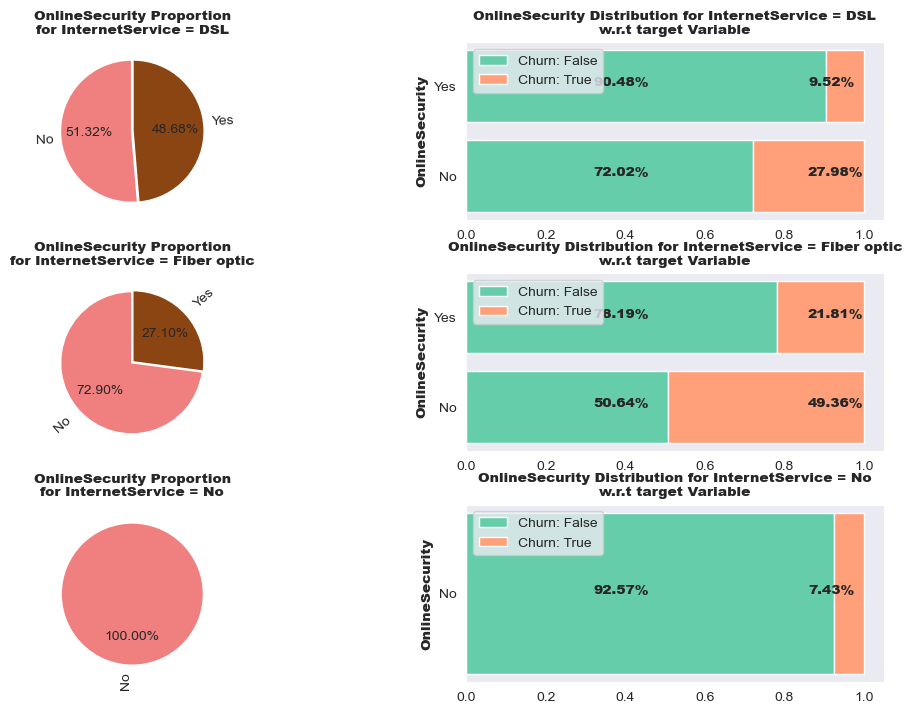

In [145]:
bivariate_cat('InternetService', 'OnlineSecurity')

**Remarks:**

- 48.68% of the customers with `InternetService` as `DSL` opted for `OnlineSecurity`.
- 27.10% of the customers with `InternetService` as `Fiber optic` opted for `OnlineSecurity`

### Inferences: 
- Those who are not opted for `OnlineSecurity` with `InternetService` as `DSL` are churning 193.90% more than that of customers with `InternetService` as `DSL` opted for `OnlineSecurity`
- Those who are not opted for `OnlineSecurity` with `InternetService` as `Fiber optic` are churning 126.31% more than that of customers with `InternetService` as `DSL` opted for `OnlineSecurity`
- `OnlineSecurity` for customers with `InternetService` as `Fiber optic` is one of the root cause of churning.
- Customers without `InternetService` are churning more than that of with `OnlineSecurity`

### Hypothesis:
- `OnlineSecurity` for customers with `InternetService` is one of the decisive feaure for predictive modeling.

# <u>Numerical Features:</u>

In [48]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [49]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [50]:
ct = pd.crosstab(index = df['SeniorCitizen'],
           columns=df['Churn'], 
           margins= True)
ft = ct/ct.iloc[-1, -1]
ft


Churn,No,Yes,All
SeniorCitizen,,,
0,0.639505,0.198094,0.8376
1,0.094710,0.067691,0.1624
All,0.734215,0.265785,1.0000


**Remarks:**
- 83.76% customers are not senior setizen.
- 23.36% of non-Senior citezen churns while 41.68% Senior Citizen Churns.

### Inference:
- Customers who are `SeniorCitizen` are churning 18.32% more than the customers who are not `SeniorCitizen` in absolute manner.
- Customers who are `SeniorCitizen` are churning 78.42% more w.r.t customers who are not `SeniorCitizen` in comparitive sense.

### Hypothesis:
- `SeniorCitizen` is of extreme importance for predictive model.

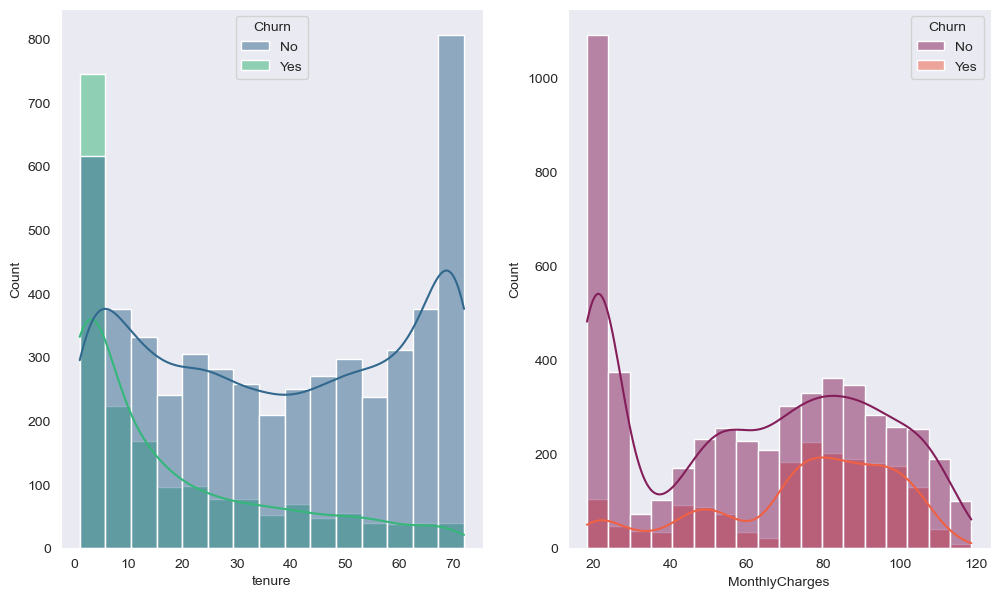

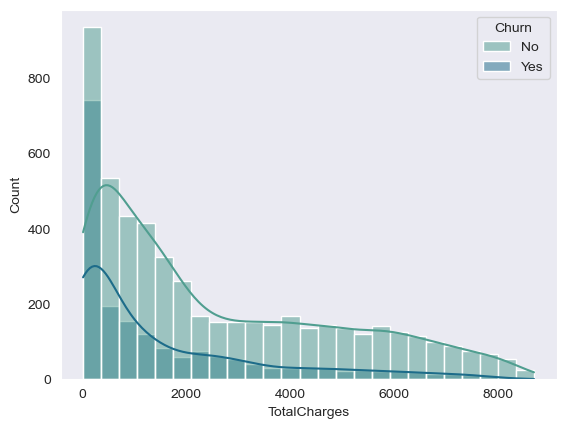

In [51]:
## tenure
plt.subplots(nrows= 1, ncols=2, figsize = (12,7))

plt.subplot(121)
sns.histplot(data=df, x="tenure", hue="Churn",kde=True,palette="viridis")

plt.subplot(122)
sns.histplot(data=df, x="MonthlyCharges", hue="Churn",kde=True,palette="rocket")

plt.show()

sns.histplot(data=df, x="TotalCharges", hue="Churn",kde=True,palette="crest")
plt.show()

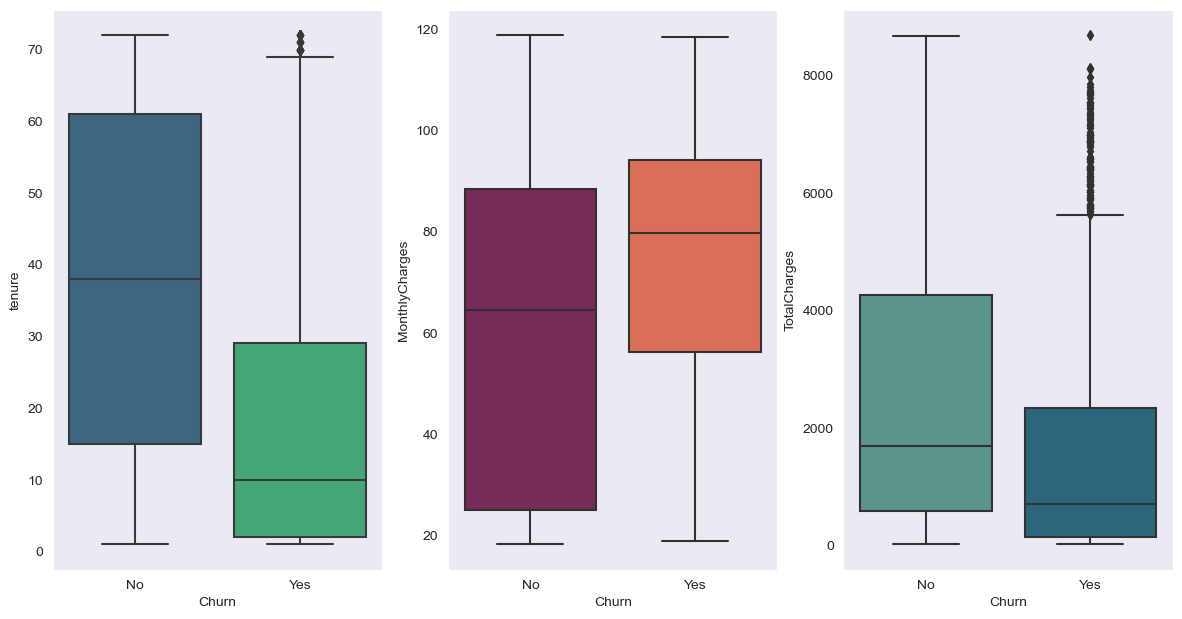

In [52]:
plt.subplots(nrows=1, ncols=3, figsize = (14,7))

plt.subplot(131)
sns.boxplot(x = 'Churn', y = 'tenure',
             data = df, palette="viridis")

plt.subplot(132)
sns.boxplot(x = 'Churn', y = 'MonthlyCharges',
             data = df, palette="rocket")

plt.subplot(133)
sns.boxplot(x = 'Churn', y = 'TotalCharges',
             data = df, palette="crest")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)
plt.show()

**Remarks:**
- Both `tenure` and `MonthlyCharges` are symmetrically distributed with skewness 0.23 and -0.22 respectively, whereas the `TotalCharges` feature is positively skewed with skewness 0.96
- Customers with `tenure` than 30 are the churners, whereas customers with `MonthlyCharges` between 56 to 94 are churners.
- customers with `TotalCharges` between 134 to 2330 are churners.

- mean `tenure` for churners is 17.97 with 19.53 std deviation.
- mean `MonthlyCharges` for churners is 74.44 with 24.66 std deviation.
- mean `TotalCharges` for churners is 1531 with 1890 std deviation.

## Hypothesis:

- Customers are likely to churn within intial days of subscribtion.
- As the monthly charges increases customers churn out.

In [53]:
df.groupby('Churn', axis = 0).aggregate([min, np.mean, np.median, np.std, max]).T

Churn                           No          Yes
SeniorCitizen  min        0.000000     0.000000
               mean       0.128995     0.254682
               median     0.000000     0.000000
               std        0.335227     0.435799
               max        1.000000     1.000000
tenure         min        1.000000     1.000000
               mean      37.650010    17.979133
               median    38.000000    10.000000
               std       24.076940    19.531123
               max       72.000000    72.000000
MonthlyCharges min       18.250000    18.850000
               mean      61.307408    74.441332
               median    64.450000    79.650000
               std       31.094557    24.666053
               max      118.750000   118.350000
TotalCharges   min       18.800000    18.850000
               mean    2555.344141  1531.796094
               median  1683.600000   703.550000
               std     2329.456984  1890.822994
               max     8672.450000  8684.800000

In [54]:
df.groupby('Churn', axis = 0).quantile([0.25, 0.5, 0.75]).T

Churn                No                        Yes                
                   0.25     0.50      0.75    0.25    0.50    0.75
SeniorCitizen     0.000     0.00     0.000    0.00    0.00     1.0
tenure           15.000    38.00    61.000    2.00   10.00    29.0
MonthlyCharges   25.100    64.45    88.475   56.15   79.65    94.2
TotalCharges    577.825  1683.60  4264.125  134.50  703.55  2331.3

## Bivariate Analysis:


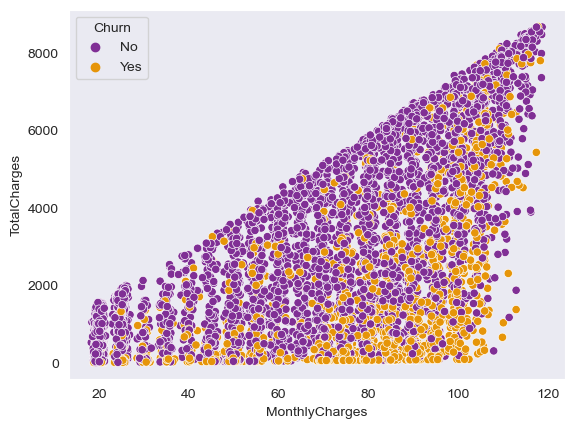

In [55]:
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges',
               data = df, hue = 'Churn',
               palette='CMRmap')
plt.show()

**Remarks:**
- Most of the customers with high `MonthlyCharges` above 60 and `TotalCharges` upto 3000 are likely to churn.

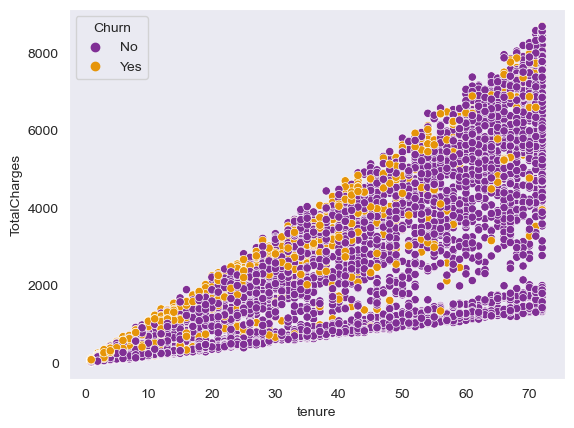

In [56]:
sns.scatterplot(x = 'tenure', y = 'TotalCharges',
               data = df, hue = 'Churn',
               palette='CMRmap')
plt.show()

**Remarks:**
- Data shows that `tenure` and `TotalCharges` are linearly correlated for the customer who churns, i.e. as the tenure and total charges increases cutomer churns.

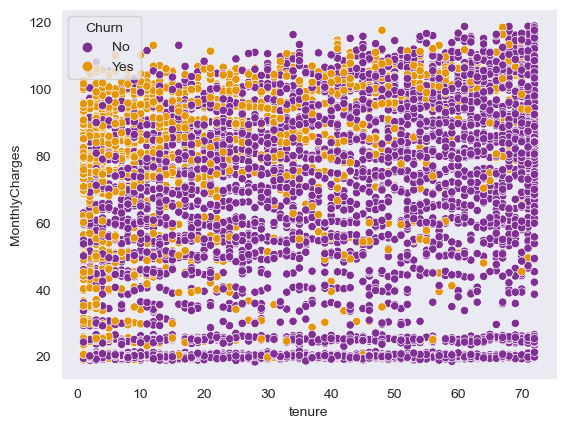

In [57]:
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges',
               data = df, hue = 'Churn',
               palette='CMRmap')
plt.show()

**Remark:**
- Customers with `tenure` less than 30 and high `MonthlyCharges` are most likely to churn.

# <u>Feature Engineering</u>:

In [241]:
from sklearn.model_selection import train_test_split

In [296]:
X = df.drop(columns= ['customerID', 'Churn'])
y = df['Churn']
print(X.shape, y.shape)


(7032, 19) (7032,)


In [299]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y = le.fit_transform(y)

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                   random_state=42,
                                                   shuffle=True,
                                                   stratify = y)
print(X_train.shape, X_test.shape)

(5274, 19) (1758, 19)


In [301]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3687,Male,0,Yes,Yes,19,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),100.00,1888.65
5553,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,55.70,55.70
6870,Male,0,No,No,49,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.60,3720.35
1874,Female,0,Yes,No,43,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),86.45,3574.50
147,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.65,45.65


In [302]:
num_cols = [col for col in df.select_dtypes(exclude='object').columns if col != 'SeniorCitizen']
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [303]:
spec_col = []
le_cols = []
ohe_cols = []

for col in X_train.select_dtypes(include= 'object').columns:
    if len(df[col].unique()) < 2:
        sec_col.append(col)
    elif len(df[col].unique()) == 2:
        le_cols.append(col)
    else:
        ohe_cols.append(col)

print(f'no. of binary columns:{len(le_cols)}', f'\nno of columns for one-hot encoding: {len(ohe_cols)}', f"\nno of constant value columns: {len(spec_col)}")

no. of binary columns:12 
no of columns for one-hot encoding: 3 
no of constant value columns: 0


In [304]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [305]:
le = OrdinalEncoder()
ohe = OneHotEncoder(sparse=False)
sc = StandardScaler()
col_tr = ColumnTransformer(transformers = [('le' ,le, le_cols),
                                          ('ohe' ,ohe, ohe_cols),
                                          ('sc', sc, num_cols)],
                          remainder= 'passthrough')

X_train_transformed = col_tr.fit_transform(X_train)
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,-0.550434,1.162877,-0.179659,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.283779,-0.305269,-0.984606,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.671808,0.321096,0.624738,0.0
3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.427360,0.713817,0.560688,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.283779,-0.638336,-0.989019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.387468,-0.356638,-0.432700,0.0
5270,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.323670,0.200131,0.991366,1.0
5271,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.142170,0.927576,0.474943,0.0
5272,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.917106,0.032769,-0.719203,0.0


# <u>Model building</u>

## Baseline Model

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

## Experiment 1 : Training Simple Model- Logistic Regression

In [407]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train,
                                                        test_size= 0.2,
                                                        shuffle= True,
                                                       stratify=y_train,
                                                       random_state=42)

model = LogisticRegression()
model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)
cm = confusion_matrix(y_test1, y_pred1)
accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
print(cm,f'\n{accuracy}', precision)

[[683  92]
 [117 163]] 
0.8018957345971564 0.6392156862745098


In [349]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [274]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state= 42)

In [313]:
Precision = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train_transformed, y_train)):
    X_tr = X_train_transformed[train_idx]
    y_tr = y_train[train_idx]
    
    X_tst = X_train_transformed[test_idx]
    y_tst = y_train[test_idx]
    
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_tst)
    precision = precision_score(y_tst, y_pred)
    
    Precision.append(precision)
    
    print("Fold:", i+1, "Precison: %.3f" %precision)

print("Average KFold score: %.3f +/- %.3f" %(np.mean(Precision), np.std(Precision)))

Fold: 1 Precison: 0.593
Fold: 2 Precison: 0.643
Fold: 3 Precison: 0.670
Fold: 4 Precison: 0.620
Fold: 5 Precison: 0.702
Fold: 6 Precison: 0.681
Fold: 7 Precison: 0.597
Fold: 8 Precison: 0.664
Fold: 9 Precison: 0.602
Fold: 10 Precison: 0.724
Average KFold score: 0.650 +/- 0.044


In [381]:
train_sizes, train_scores, test_scores = learning_curve(estimator = model,
                                                        X = X_train_transformed, y = y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv = skf,
                                                       random_state=42)

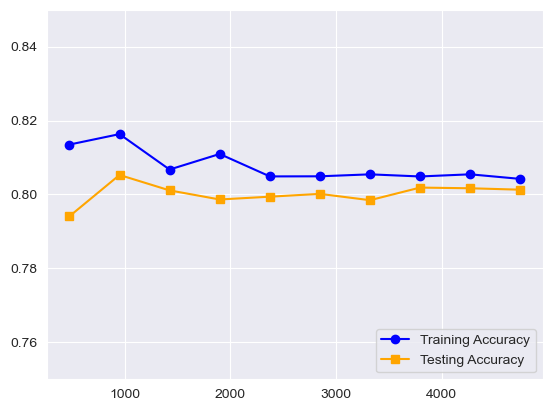

In [382]:
sns.set_style(style = 'darkgrid')
plt.plot(train_sizes, np.mean(train_scores, axis = 1),
        color = 'blue', marker = 'o',
        label = 'Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis = 1),
        color = 'orange', marker = 's',
        label = 'Testing Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.75, 0.85])
plt.show()

**remarks:**
- Learning curve shows that the accuracy cannot be further improved by adding extra observations.
- Model is suffering from underfitting.
- Also, training and testing accuracy seems to be similar also there is high training error and validation error is similar in magnitude to the training error for various training set it implies high bias problem
- To improve on high bias, we need to model a complex model thus by regualarising or by creating a new model.
- Therefore, we can assume that the data is non-linear and can be classified using non linear classifier like decision tree.

## Model Evaluation for Regularization:

In [383]:
##trying l1 penalty
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(LogisticRegression(penalty= 'l1',solver= 'liblinear'),
                                             X = X_train_transformed, y = y_train,
                                             param_name='C',
                                             param_range=param_range,
                                             cv = skf)

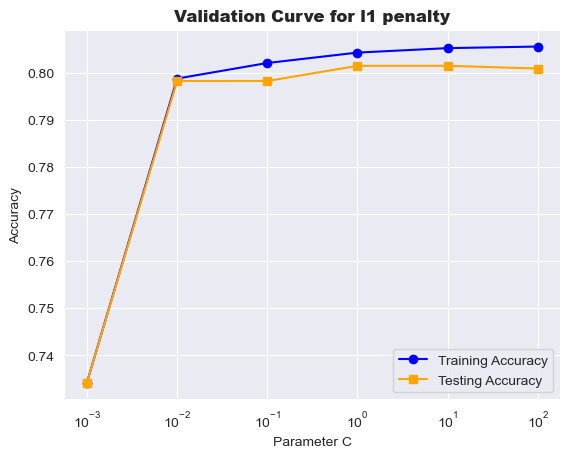

In [384]:
plt.plot(param_range, np.mean(train_scores, axis = 1),
        color = 'blue', marker = 'o',
        label = 'Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis = 1),
        color = 'orange', marker = 's',
        label = 'Testing Accuracy', )
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.legend(loc = 'lower right')
plt.title("Validation Curve for l1 penalty", weight = 'black')
plt.show()

**remarks:**
- Applying `l1` penalty does not seems to improve model perfomance

In [385]:
##trying l2 penalty
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(LogisticRegression(penalty= 'l2'),
                                             X = X_train_transformed, y = y_train,
                                             param_name='C',
                                             param_range=param_range,
                                             cv = skf)

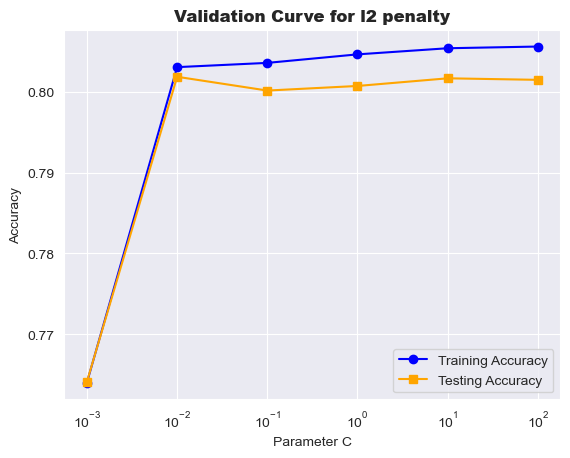

In [386]:
plt.plot(param_range, np.mean(train_scores, axis = 1),
        color = 'blue', marker = 'o',
        label = 'Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis = 1),
        color = 'orange', marker = 's',
        label = 'Testing Accuracy', )
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.legend(loc = 'lower right')
plt.title("Validation Curve for l2 penalty", weight = 'black')
plt.show()

**remarks:**
- Applying `l1` penalty does not seems to improve model perfomance

### Summary:

- The learning curve implies that Logistic Regression model is too simple (high bias) for the given data set
- There exists a high bias and low variance for the model.
- The validation curve for both the penalities implies that, Regularizing model by adding penalties doesn't improve on high bias.

**Conclusion:**
- To improve the model performance more complex model such as `DecisionTreeClassifier` or `RandomForest` need to be trained.

## Experiment 2 : Training Complex Model - Decision Tree Classifier

In [409]:
model1 = DecisionTreeClassifier()
model1.fit(X_train1, y_train1)
y_pred2 = model1.predict(X_test1)
cm1 = confusion_matrix(y_test1, y_pred2)
accuracy1 = accuracy_score(y_test1, y_pred2)
precision1 = precision_score(y_test1, y_pred2)
print(cm1,f'\n{accuracy1}', precision1)

[[632 143]
 [119 161]] 
0.7516587677725118 0.5296052631578947


In [326]:
Dt_Precision = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train_transformed, y_train)):
    X_tr = X_train_transformed[train_idx]
    y_tr = y_train[train_idx]
    
    X_tst = X_train_transformed[test_idx]
    y_tst = y_train[test_idx]
    
    model1.fit(X_tr, y_tr)
    y_pred = model1.predict(X_tst)
    precision = precision_score(y_tst, y_pred)
    
    Dt_Precision.append(precision)
    
    print("Fold:", i+1, "Precison: %.3f" %precision)

print("Average KFold score: %.3f +/- %.3f" %(np.mean(Dt_Precision), np.std(Dt_Precision)))

Fold: 1 Precison: 0.409
Fold: 2 Precison: 0.507
Fold: 3 Precison: 0.504
Fold: 4 Precison: 0.451
Fold: 5 Precison: 0.500
Fold: 6 Precison: 0.493
Fold: 7 Precison: 0.513
Fold: 8 Precison: 0.497
Fold: 9 Precison: 0.531
Fold: 10 Precison: 0.520
Average KFold score: 0.492 +/- 0.034


In [327]:
train_sizes, train_scores, test_scores = learning_curve(estimator = model1,
                                                        X = X_train_transformed, y = y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv = skf,
                                                       random_state=42)

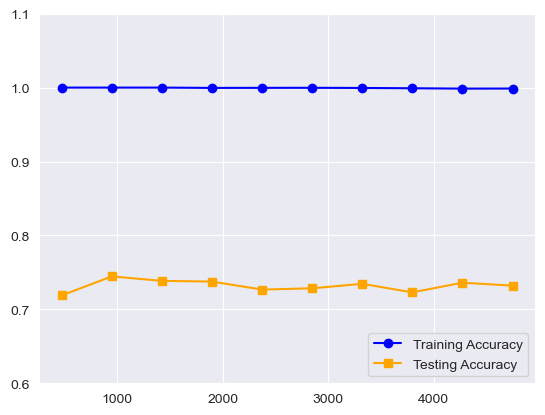

In [333]:
sns.set_style(style = 'darkgrid')
plt.plot(train_sizes, np.mean(train_scores, axis = 1),
        color = 'blue', marker = 'o',
        label = 'Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis = 1),
        color = 'orange', marker = 's',
        label = 'Testing Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.60, 1.1])
plt.show()

**remarks:**
- Training curve has much better score than the testing curve.
- Learning curve for decision tree classifier implies that model is overfitting on training sample and performs poorly on test samples thus there exists high variance.
- Better generalization can be achieved either by adding more data points to the model (not feasible in over case) or by reducing model complexity by post pruning.

## Model Evaluation for Regularization:
### Cost Complexity Pruning

In [387]:
path = model1.cost_complexity_pruning_path(X_train_transformed, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [390]:
param_range = ccp_alphas
train_scores, test_scores = validation_curve(DecisionTreeClassifier(),
                                             X = X_train_transformed, y = y_train,
                                             param_name='ccp_alpha',
                                             param_range=param_range,
                                             cv = skf)

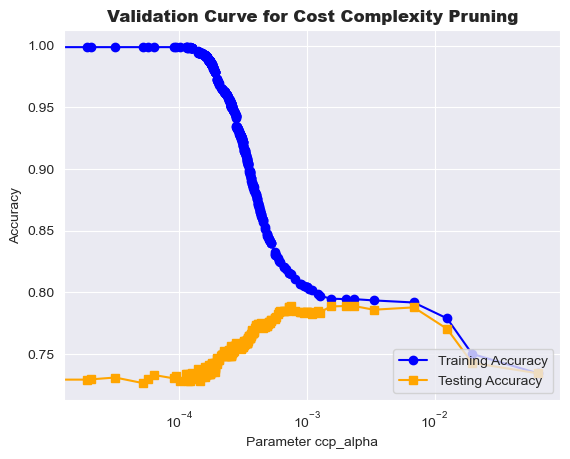

In [396]:
plt.plot(param_range, np.mean(train_scores, axis = 1),
        color = 'blue', marker = 'o',
        label = 'Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis = 1),
        color = 'orange', marker = 's',
        label = 'Testing Accuracy', )
plt.xscale('log')
plt.xlabel('Parameter ccp_alpha')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.legend(loc = 'lower right')
plt.title("Validation Curve for Cost Complexity Pruning", weight = 'black')
plt.show()

In [426]:
model1 = DecisionTreeClassifier(random_state=0 ,
                                ccp_alpha = 0.003)
model1.fit(X_train1, y_train1)
y_pred2 = model1.predict(X_test1)
cm1 = confusion_matrix(y_test1, y_pred2)
accuracy1 = accuracy_score(y_test1, y_pred2)
precision1 = precision_score(y_test1, y_pred2)
print(cm1,f'\n{accuracy1}', precision1)

[[696  79]
 [144 136]] 
0.7886255924170616 0.6325581395348837


In [449]:
param_range = [2,3,4,5,6,7,8,9]
train_scores, test_scores = validation_curve(DecisionTreeClassifier(),
                                             X = X_train_transformed, y = y_train,
                                             param_name='max_depth',
                                             param_range=param_range,
                                             cv = skf)


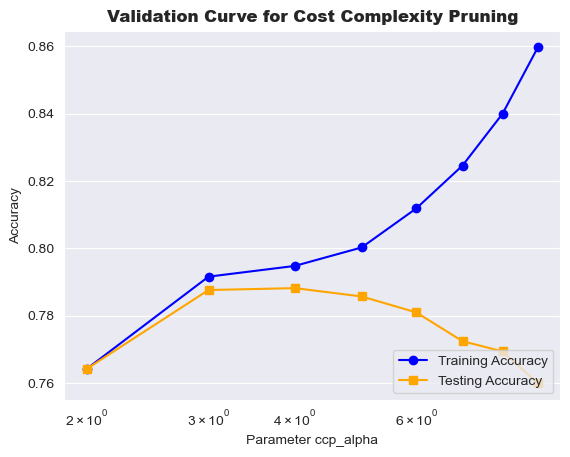

In [450]:
plt.plot(param_range, np.mean(train_scores, axis = 1),
        color = 'blue', marker = 'o',
        label = 'Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis = 1),
        color = 'orange', marker = 's',
        label = 'Testing Accuracy', )
plt.xscale('log')
plt.xlabel('Parameter ccp_alpha')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.legend(loc = 'lower right')
plt.title("Validation Curve for Cost Complexity Pruning", weight = 'black')
plt.show()

**Remarks:**
- By adding regularization variance of the model has decreased however, the model performance is similar to the linear model developed in Experiment 1.


## Experiment 3 : Training Complex Model - Random Forest Classifier

In [439]:
from sklearn.ensemble import RandomForestClassifier

In [441]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train1, y_train1)
y_pred3 = random_forest.predict(X_test1)
cm3 = confusion_matrix(y_test1, y_pred3)
accuracy3 = accuracy_score(y_test1, y_pred3)
precision3 = precision_score(y_test1, y_pred3)
print(cm3,f'\n{accuracy3}', precision3)

[[685  90]
 [138 142]] 
0.7838862559241706 0.6120689655172413


In [442]:
train_sizes, train_scores, test_scores = learning_curve(estimator = random_forest,
                                                        X = X_train_transformed, y = y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv = skf,
                                                       random_state=42)

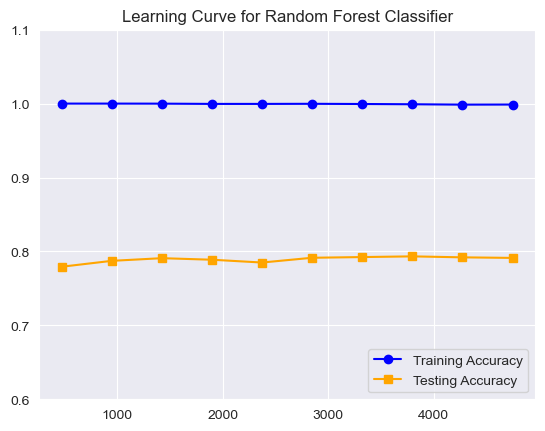

In [443]:
sns.set_style(style = 'darkgrid')
plt.plot(train_sizes, np.mean(train_scores, axis = 1),
        color = 'blue', marker = 'o',
        label = 'Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis = 1),
        color = 'orange', marker = 's',
        label = 'Testing Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.60, 1.1])
plt.title("Learning Curve for Random Forest Classifier")
plt.show()

## Hyperparameter Tuning

In [455]:
from sklearn.model_selection import RandomizedSearchCV

In [459]:
param_grid_rf = {'n_estimators': np.arange(10,2000,10),
                'max_features': ['auto', 'sqrt'],
                'max_depth': np.arange(10, 200, 5),
                 'criterion': ['gini', 'entropy']              
                }
random_search = RandomizedSearchCV(estimator=random_forest,
                  param_distributions= param_grid_rf,
                  cv = skf)
random_search.fit(X_train_transformed, y_train)


[[685  90]
 [138 142]] 
0.7838862559241706 0.6120689655172413


In [473]:
y_pred3_1 = random_search.predict(X_test1)
cm3_1 = confusion_matrix(y_test1, y_pred3_1)
accuracy3_1 = accuracy_score(y_test1, y_pred3_1)
precision3_1 = precision_score(y_test1, y_pred3_1)
print(cm3_1,f'\n{accuracy3_1}', precision3_1)

[[774   1]
 [  1 279]] 
0.9981042654028436 0.9964285714285714


In [461]:
random_search.best_params_

{'n_estimators': 1540,
 'max_features': 'auto',
 'max_depth': 60,
 'criterion': 'gini'}

**Conclusion:**
- After exploring transforming the data, we tried different machine learning algorithms using default parameters.
- We tried to improve performance using regularization and hyperparameter tunnig.
- Thorugh our experimentations we found that no model can improve above 80% accuracy.
- Finally, we select Logistic regression model obtaining an accuracy of nearly 80%.

## Final Model:


In [480]:
clf = LogisticRegression()

In [482]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [487]:
param_grid = {
    'C' : [0.001, 0.01, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': [ 'lbfgs', 'liblinear']
}

rcv = RandomizedSearchCV(estimator= clf,
                        param_distributions= param_grid,
                        cv = skf)
rcv.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'liblinear']})

In [488]:
rcv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

In [490]:
clf = LogisticRegression(
    penalty='l2',
    C=10,
    solver= 'liblinear',
                        )
clf.fit(X_train_transformed, y_train)

LogisticRegression(C=10, solver='liblinear')

In [491]:
X_test = col_tr.fit_transform(X_test)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [493]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('Confusion matrix of the model is:',f'\n{cm}',f'\nAccuracy of the model is: {accuracy}', f'\nPrecision of the model is: {precision}')

Confusion matrix of the model is: 
[[1151  140]
 [ 206  261]] 
Accuracy of the model is: 0.8031854379977247 
Precision of the model is: 0.6508728179551122
